In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xlrd
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('stakingrewards_only_staking_protocol.csv')
bep20_data = pd.read_csv('coinlore_top20_BEP.csv',sep = ",", encoding='latin')
#insurance_df = pd.read_excel("Toju Data.xlsx", sheet_name='INSURANCE')
#data =  data.drop('Unnamed: 0', 1)
print(data.shape)
data.head()

(400, 10)


,serial,token_full_name,token,description,price-usd,price_change_percentage,volume_24h_usd,circulating_market_cap_usd,onchain_market_cap_usd,holders
0,1,Binance-Peg Ethereum Token (ETH),ETH,"Ethereum is a global, open-source platform for...",1277.85,0.074234,3.477153e+09,1.539900e+11,7.730992e+08,1434523
1,2,Binance-Peg BSC-USD (BSC-USD),BUSD,A pegged token by Binance which gives you the ...,1.00,0.000058,1.840683e+10,6.576994e+10,3.183178e+09,5835894
2,3,Wrapped BNB (WBNB),WBNB,"As the native coin of Binance Chain, BNB has m...",289.12,0.016796,5.379993e+08,4.625008e+10,1.102984e+09,1767472
3,4,Binance-Peg USD Coin (USDC),USDC,USD Coin (known by its ticker USDC) is a stabl...,1.00,0.000058,1.288892e+09,4.275887e+10,8.790000e+08,577583
4,5,USDC (anyUSDC),NaN,Cross-chain router protocol.,1.00,0.000058,1.288892e+09,4.275887e+10,3.015960e+06,1719


In [3]:
print(bep20_data.shape)
bep20_data.head()

(3198, 10)


,token,token_name,market_cap,price_dollar,volume_24h,supply,price_chng_24h,price_chng_7d,serial,Unnamed: 9
0,BUSD,Binance USD,17.6 B,1.0000,3.6 B,17.6 B,-0.01%,-0.09%,NaN,NaN
1,TWT,Trust Wallet Token,1.1 B,2.6300,64.1 M,416.6 M,2.19%,7.54%,1.0,NaN
2,CAKE,PancakeSwap,646.5 M,3.9300,22.5 M,164.5 M,-1.90%,-1.50%,2.0,NaN
3,RUNE,THORChain,457.1 M,1.3800,12.5 M,330.7 M,-2.94%,0.99%,3.0,NaN
4,DOME,Everdome,76.5 M,0.0000,6.4 M,24.6 B,-13.64%,19.21%,4.0,NaN


In [4]:

print(bep20_data.isna().sum())

token                0
token_name           0
market_cap           1
price_dollar         1
volume_24h         907
supply               1
price_chng_24h       1
price_chng_7d        1
serial               3
Unnamed: 9        3197
dtype: int64


In [5]:
print(data.isna().sum())

serial                          0
token_full_name                 0
token                           1
description                    12
price-usd                       0
price_change_percentage         0
volume_24h_usd                124
circulating_market_cap_usd    177
onchain_market_cap_usd        123
holders                         0
dtype: int64


In [6]:
final_df= pd.merge(bep20_data, data, on='token', how='inner')
final_df[4:10]


,token,token_name,market_cap,price_dollar,volume_24h,supply,price_chng_24h,price_chng_7d,serial_x,Unnamed: 9,serial_y,token_full_name,description,price-usd,price_change_percentage,volume_24h_usd,circulating_market_cap_usd,onchain_market_cap_usd,holders
4,TWT,Trust Wallet Token,1.1 B,2.6300,64.1 M,416.6 M,2.19%,7.54%,1.0,NaN,25,Trust Wallet (TWT),Utility token to increase adoption of cryptocu...,2.58,0.000150,47515807.0,1.075825e+09,2.582084e+09,298775
5,TWT,Trust Wallet Token,1.1 B,2.6300,64.5 M,416.6 M,2.42%,7.48%,1.0,NaN,25,Trust Wallet (TWT),Utility token to increase adoption of cryptocu...,2.58,0.000150,47515807.0,1.075825e+09,2.582084e+09,298775
6,WRX,WazirX,74.9 M,0.1600,3.4 M,456.5 M,-4.69%,-3.45%,5.0,NaN,74,wazirx token (WRX),WazirX is a India's cryptocurrency exchange wi...,0.17,0.000010,3836139.0,7.728120e+07,2.626630e+06,8911
7,WRX,WazirX,75 M,0.1600,3.4 M,456.5 M,-4.60%,-3.52%,5.0,NaN,74,wazirx token (WRX),WazirX is a India's cryptocurrency exchange wi...,0.17,0.000010,3836139.0,7.728120e+07,2.626630e+06,8911
8,BSW,Biswap,64.4 M,0.2100,2.6 M,305.4 M,-1.40%,-0.79%,8.0,NaN,77,Biswap (BSW),BSW is a deflationary token aims to incentiviz...,0.21,0.000012,8386454.0,7.484872e+07,9.546313e+07,146315
9,BSW,Biswap,64.2 M,0.2100,2.6 M,305.4 M,-1.67%,-1.08%,8.0,NaN,77,Biswap (BSW),BSW is a deflationary token aims to incentiviz...,0.21,0.000012,8386454.0,7.484872e+07,9.546313e+07,146315


In [7]:
data_staking = pd.read_csv('stakingrewards_best_1.csv')
data_staking

,serial,token_name,token,price_usd,price_24h,reward_pct,adjst_reward_pct,staking_marketcap,market_cap,staking_ratio
0,1,Ethereum,ETH,1251.87,-1.76%,0.0419,0.0414,20642440615,150903910544,0.1349
1,2,Cardano,ADA,0.31,-2.55%,0.0350,-0.0010,7653097052,10709854119,0.7115
2,3,BNB Chain,BNB,276.87,-4.49%,0.0334,0.0856,5831968517,45101808542,0.8744
3,4,Solana,SOL,13.17,-3.87%,0.0761,0.0178,4935016376,4821720985,0.7002
4,5,Avalanche,AVAX,12.80,-4.83%,0.0854,0.0334,3187776486,3971479234,0.6005
...,...,...,...,...,...,...,...,...,...,...
192,179,TrueUSD,TUSD,1.00,-0.07%,0.0447,0.0447,145789325,756386656,NaN
193,180,sUSD,SUSD,1.01,0.70%,0.0067,0.0067,29012046,40784950,NaN
194,182,Binance USD,BUSD,1.00,0%,0.0475,0.0475,51999136,22113974415,NaN
195,184,Gemini Dollar,GUSD,1.00,-0.30%,0.0000,0.0000,unknown,593315098,NaN


In [8]:
final_df_1= pd.merge(bep20_data,data_staking, on='token', how='inner')
final_df_1 = final_df_1.drop_duplicates(subset="token",
                     inplace=False)  
final_df_1

,token,token_name_x,market_cap_x,price_dollar,volume_24h,supply,price_chng_24h,price_chng_7d,serial_x,Unnamed: 9,serial_y,token_name_y,price_usd,price_24h,reward_pct,adjst_reward_pct,staking_marketcap,market_cap_y,staking_ratio
0,BUSD,Binance USD,17.6 B,1.0000,3.6 B,17.6 B,-0.01%,-0.09%,NaN,NaN,182,Binance USD,1.00,0%,0.0475,0.0475,51999136,22113974415,NaN
2,CAKE,PancakeSwap,646.5 M,3.9300,22.5 M,164.5 M,-1.90%,-1.50%,2.0,NaN,15,PancakeSwap,3.88,-2.76%,0.7036,0.5737,945681614,613047674,0.2406
6,RUNE,THORChain,457.1 M,1.3800,12.5 M,330.7 M,-2.94%,0.99%,3.0,NaN,34,Thorchain,1.37,-2.84%,0.2560,0.2116,164807713,413507539,0.4001
10,EVER,EverSwap,$0,0.0000,$0,0,-3.13%,-2.91%,2891.0,NaN,86,Everscale,0.04,-0.33%,0.1054,0.0765,10361694,60998542,0.1416


In [9]:
final_df_1.columns

Index(['token', 'token_name_x', 'market_cap_x', 'price_dollar', 'volume_24h',
       'supply', 'price_chng_24h', 'price_chng_7d', 'serial_x', 'Unnamed: 9',
       'serial_y', 'token_name_y', 'price_usd', 'price_24h', 'reward_pct',
       'adjst_reward_pct', 'staking_marketcap', 'market_cap_y',
       'staking_ratio'],
      dtype='object')

In [10]:
cols = ['token', 'price_dollar', 
       'supply', 'reward_pct', 'adjst_reward_pct','staking_marketcap', 'market_cap_y', 'staking_ratio']
final_df = final_df_1[cols]
final_df

,token,price_dollar,supply,reward_pct,adjst_reward_pct,staking_marketcap,market_cap_y,staking_ratio
0,BUSD,1.0000,17.6 B,0.0475,0.0475,51999136,22113974415,NaN
2,CAKE,3.9300,164.5 M,0.7036,0.5737,945681614,613047674,0.2406
6,RUNE,1.3800,330.7 M,0.2560,0.2116,164807713,413507539,0.4001
10,EVER,0.0000,0,0.1054,0.0765,10361694,60998542,0.1416


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 10
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   token              4 non-null      object 
 1   price_dollar       4 non-null      object 
 2   supply             4 non-null      object 
 3   reward_pct         4 non-null      float64
 4   adjst_reward_pct   4 non-null      float64
 5   staking_marketcap  4 non-null      object 
 6   market_cap_y       4 non-null      int64  
 7   staking_ratio      3 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 288.0+ bytes


In [12]:
final_df = final_df.astype({"token": "category"})
#final_df.astype({"price_dollar": "float","staking_marketcap": "int64", "market_cap_y": "int64", "staking_ratio": "float" })

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 10
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   token              4 non-null      category
 1   price_dollar       4 non-null      object  
 2   supply             4 non-null      object  
 3   reward_pct         4 non-null      float64 
 4   adjst_reward_pct   4 non-null      float64 
 5   staking_marketcap  4 non-null      object  
 6   market_cap_y       4 non-null      int64   
 7   staking_ratio      3 non-null      float64 
dtypes: category(1), float64(3), int64(1), object(3)
memory usage: 464.0+ bytes


TypeError: cannot unpack non-iterable AxesSubplot object

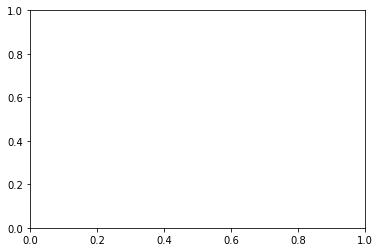

In [14]:
final_df.set_index('token').plot.bar()

In [ ]:
final_df.set_index('token').plot.scatter()